In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [2]:
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [7]:
univariate_column_label=['DEWIHOBT9_I0','AEDAHO_T9_V2','AEWIHO_T9AV2']

In [8]:
size_column = len(univariate_column_label)
print(size_column)

3


In [9]:
univariate_data=test_new.iloc[2000:7000][univariate_column_label]
univariate_data=univariate_data.loc[::-1]
print(univariate_data.head())

                     DEWIHOBT9_I0  AEDAHO_T9_V2  AEWIHO_T9AV2
dateTime                                                     
2019-04-06 00:21:00         100.0     72.427071     76.598087
2019-04-06 00:22:00         100.0     71.620643     76.358689
2019-04-06 00:23:00         100.0     70.606738     77.241097
2019-04-06 00:24:00         100.0     70.531626     77.062413
2019-04-06 00:25:00         100.0     70.692115     76.297974


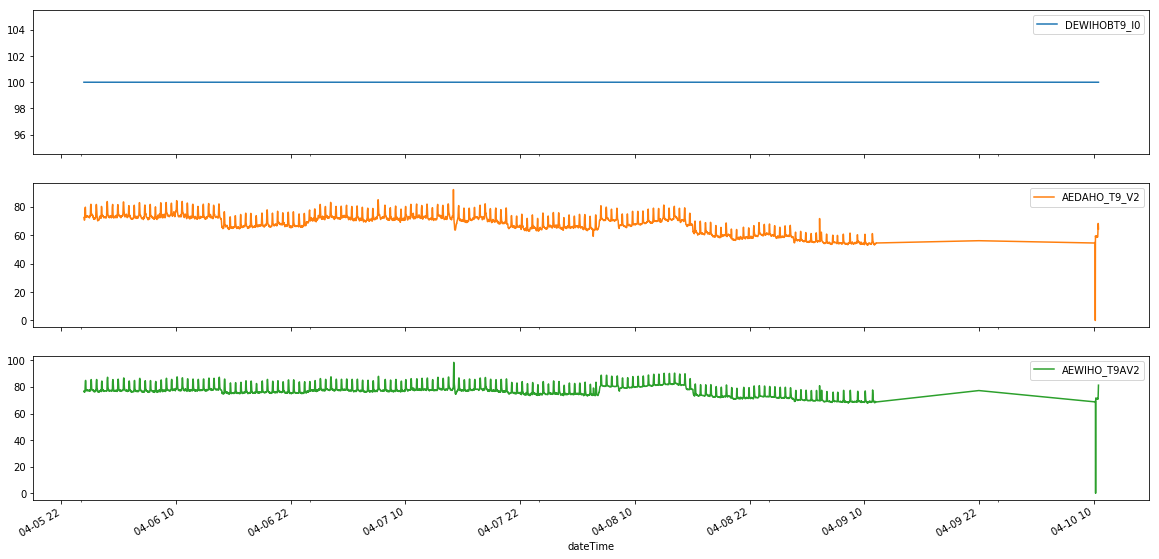

In [11]:
ax = univariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [12]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in univariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  0


In [13]:
if zero_index.size > 0:
    univariate_data_modify = univariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    univariate_data_modify = univariate_data

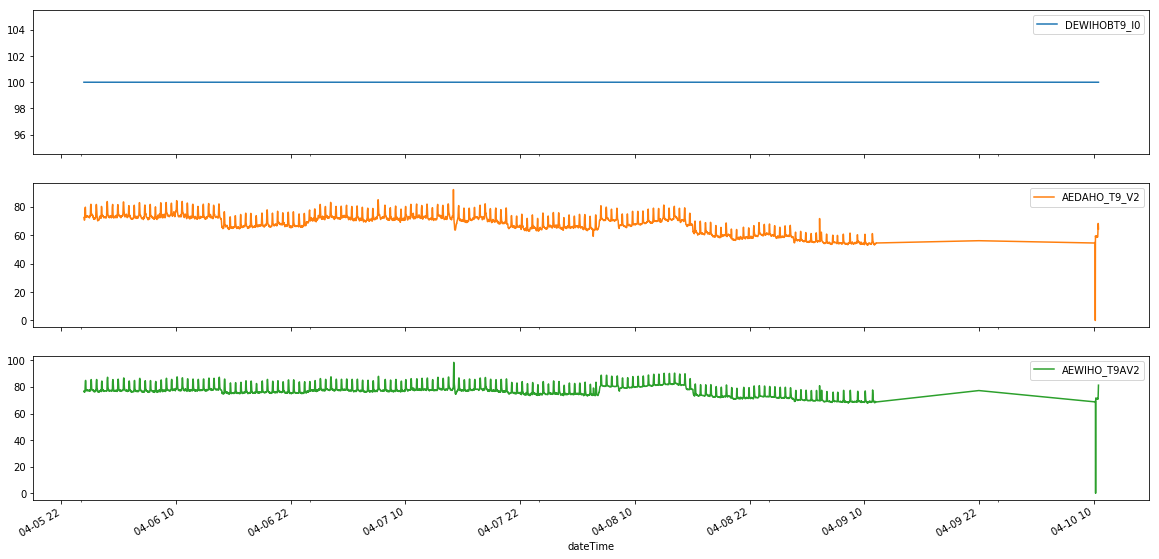

In [14]:
bx = univariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [15]:
univariate_data_1= univariate_data_modify.drop(['DEWIHOBT9_I0','AEWIHO_T9AV2'], axis=1)
univariate_data_2= univariate_data_modify.drop(['DEWIHOBT9_I0','AEDAHO_T9_V2'], axis=1)

In [16]:
print('univariate_data_1 head: \n',univariate_data_1.head())
print('univariate_data_2 head: \n',univariate_data_2.head())

univariate_data_1 head: 
                      AEDAHO_T9_V2
dateTime                         
2019-04-06 00:21:00     72.427071
2019-04-06 00:22:00     71.620643
2019-04-06 00:23:00     70.606738
2019-04-06 00:24:00     70.531626
2019-04-06 00:25:00     70.692115
univariate_data_2 head: 
                      AEWIHO_T9AV2
dateTime                         
2019-04-06 00:21:00     76.598087
2019-04-06 00:22:00     76.358689
2019-04-06 00:23:00     77.241097
2019-04-06 00:24:00     77.062413
2019-04-06 00:25:00     76.297974


In [17]:
from numpy import nan
univariate_data_drop_zero_1 = univariate_data_1.replace(0,nan)
univariate_data_drop_zero_1 = univariate_data_drop_zero_1.dropna(how='any',axis=0)

univariate_data_drop_zero_2 = univariate_data_2.replace(0,nan)
univariate_data_drop_zero_2 = univariate_data_drop_zero_2.dropna(how='any',axis=0)

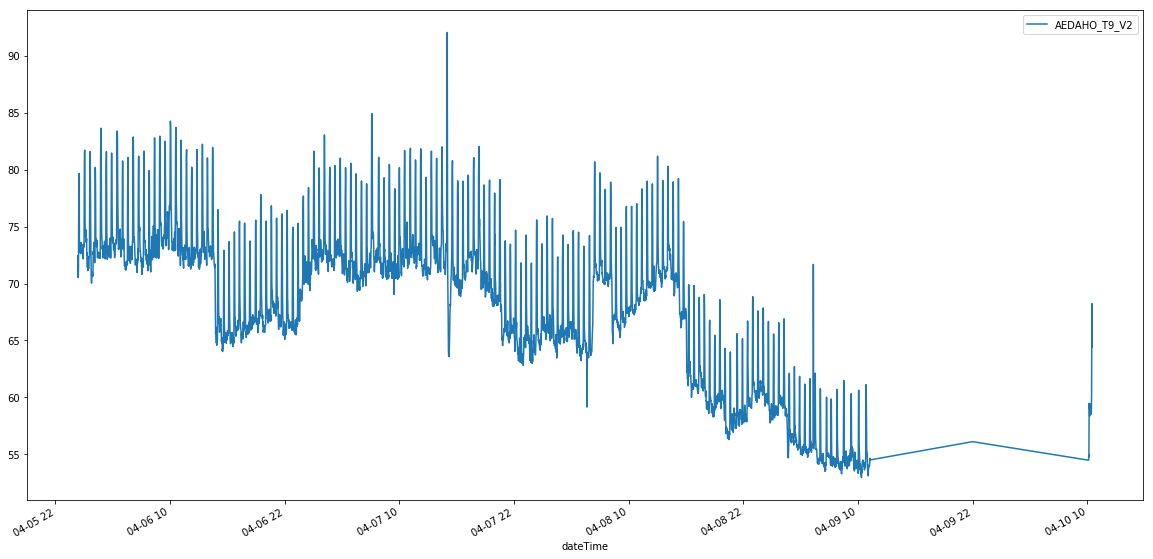

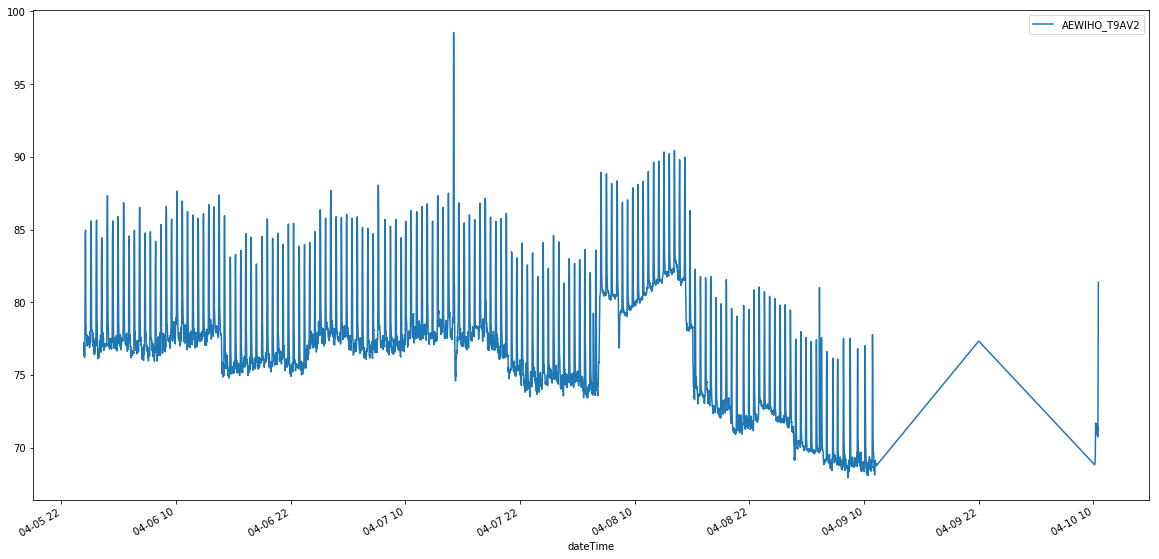

In [18]:
cx = univariate_data_drop_zero_1.plot()
dx = univariate_data_drop_zero_2.plot()
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [40]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.9)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    train_data = dataset[0:NumberOfElements]
    test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_data_stack, test_data_stack = make_dataset(univariate_data_drop_zero_2)
print('train_data_stack shape: ', train_data_stack.shape)
print('test_data_stack shape: ', test_data_stack.shape)

dataset length:  4999
Number of Elements for training:  4499
train_data_stack shape:  (4499, 1)
test_data_stack shape:  (500, 1)


In [41]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [42]:
n_steps_stack=1

# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

X_train_stack,y_train_stack=split_sequence(train_data_stack,n_steps_stack)

In [43]:
print('X_train_stack shape: ', X_train_stack.shape)
print('y_train_stack shape: ', y_train_stack.shape)

X_train_stack shape:  (4498, 1, 1)
y_train_stack shape:  (4498, 1)


In [44]:
n_features_stack = X_train_stack.shape[-1]
X_train_stack = X_train_stack.reshape((X_train_stack.shape[0], X_train_stack.shape[1], n_features_stack))

In [45]:
print('X_train_stack shape: ', X_train_stack.shape)

X_train_stack shape:  (4498, 1, 1)


In [46]:
# If want to save the model then add validation_split = 0.2 after epochs = epochs in the line of stack_lstm.fit

from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs=30

def stack_lstm():
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_stack, n_features_stack)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    
    return model
stack_lstm=stack_lstm()

stack_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
stack_lstm.fit(X_train_stack, y_train_stack,batch_size=batch_size, epochs=epochs,callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/stack_100.h5', 
                                     save_best_only=True)])

Epoch 1/30
4498/4498 [==============================] - 2s 496us/step - loss: 463.0055 - acc: 0.0000e+00
Epoch 2/30
2048/4498 [============>.................] - ETA: 0s - loss: 1.7639 - acc: 0.0000e+00

C:\Users\atif\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


4498/4498 [==============================] - 0s 89us/step - loss: 1.7648 - acc: 0.0000e+00
Epoch 3/30
4498/4498 [==============================] - 0s 87us/step - loss: 1.7331 - acc: 0.0000e+00
Epoch 4/30
4498/4498 [==============================] - 1s 143us/step - loss: 1.8255 - acc: 0.0000e+00
Epoch 5/30
4498/4498 [==============================] - 1s 146us/step - loss: 1.8040 - acc: 0.0000e+00
Epoch 6/30
4498/4498 [==============================] - 1s 156us/step - loss: 1.7601 - acc: 0.0000e+00
Epoch 7/30
4498/4498 [==============================] - 1s 165us/step - loss: 1.8342 - acc: 0.0000e+00
Epoch 8/30
4498/4498 [==============================] - 1s 127us/step - loss: 1.8237 - acc: 0.0000e+00
Epoch 9/30
4498/4498 [==============================] - 1s 157us/step - loss: 1.7954 - acc: 0.0000e+00
Epoch 10/30
4498/4498 [==============================] - 1s 112us/step - loss: 1.8109 - acc: 0.0000e+00
Epoch 11/30
4498/4498 [==============================] - 1s 164us/step - loss: 1.7236

In [47]:
test_ip_stack,test_op_stack=split_sequence(test_data_stack,n_steps_stack)
n_feature_test = test_ip_stack.shape[-1]
X_test_ip_stack=test_ip_stack.reshape((test_ip_stack.shape[0], test_ip_stack.shape[1], n_feature_test))
print('X_test_ip_stack shape: ', X_test_ip_stack.shape)

X_test_ip_stack shape:  (499, 1, 1)


In [48]:
y_pred_stack = stack_lstm.predict(X_test_ip_stack, verbose=1)

499/499 [==============================] - 0s 495us/step


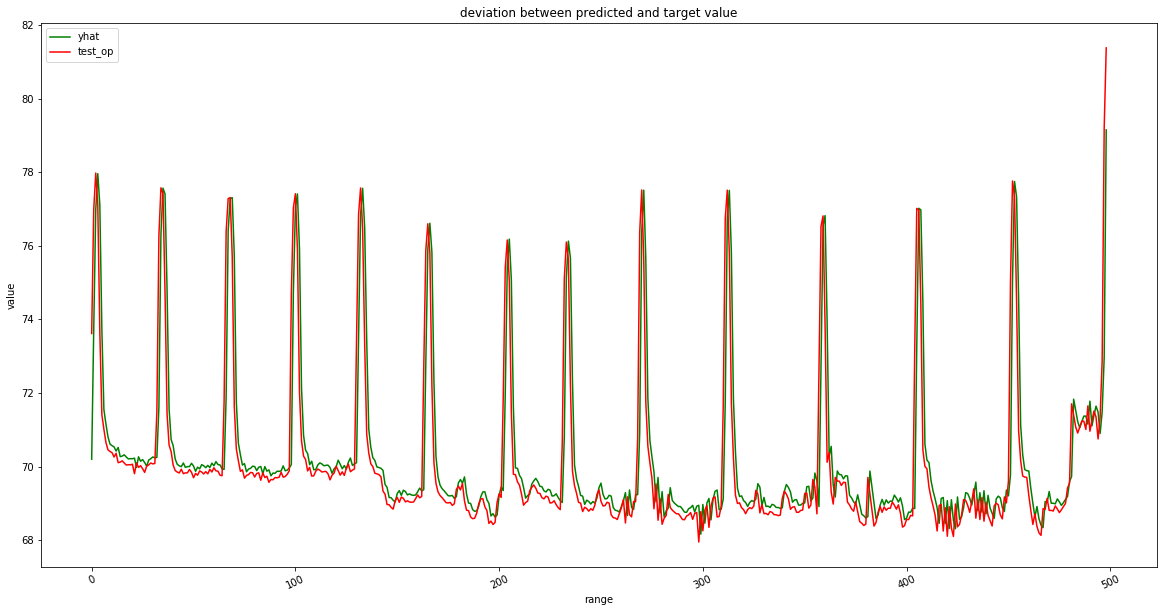

In [49]:
plt.plot(y_pred_stack,color='green')
plt.plot(test_op_stack,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['yhat', 'test_op'], loc='upper left')
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_stack,y_pred_stack)
print(Error)

1.4213801498938725
